In [14]:
##IMPORTS + CACHE

import fastf1 as ff1
import datetime
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

from PIL import Image
import urllib
import matplotlib.image as mpimg

ff1.Cache.enable_cache('cache')

#ff1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=True)

In [67]:
### Get Session

year, grand_prix, event = 2022, 'british', 'Q'

session = ff1.get_session(year, grand_prix, event)
#session.load_telemetry()
session.load()

core           INFO 	Loading data for British Grand Prix - Qualifying [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '11', '44', '4', '14', '63', '24', '6', '10', '77', '22', '3', '31', '23', '20', '5', '47', '18']


In [68]:
## VARIABLES

### Drivers

driver_1 = 'SAI'
driver_2 = 'LEC'

### Laps

laps_driver_1 = session.laps.pick_driver(driver_1)
fastest_driver_1 = laps_driver_1.pick_fastest()
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
team_driver_1 = fastest_driver_1['Team']
lap_time_1 = fastest_driver_1['LapTime'].total_seconds()
tyre_1 = fastest_driver_1['Compound']

laps_driver_2 = session.laps.pick_driver(driver_2)
fastest_driver_2 = laps_driver_2.pick_fastest()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()
team_driver_2 = fastest_driver_2['Team']
lap_time_2 = fastest_driver_2['LapTime'].total_seconds()
tyre_2 = fastest_driver_2['Compound']

lap_delta =  lap_time_2 - lap_time_1
print(lap_time_1)
print(lap_time_2)
print(lap_delta)

driver_1_label = f"{driver_1} - {lap_time_1}s - {tyre_1}"
driver_2_label = f"{driver_2} - {lap_time_2}s - {tyre_2}"

print(driver_1_label)
print(driver_2_label)

top_speed = max(telemetry_driver_1['Speed'])


def get_no_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count


def get_no_of_full_t(list):
    count = 0
    for element in list:
        if element > 98:
            count += 1
    return count


throttle = get_no_of_elements(telemetry_driver_1['Throttle'])
full_throttle = get_no_of_full_t(telemetry_driver_1['Throttle'])

print(throttle)
print(full_throttle)

throttle_perc = full_throttle/throttle*100
print(throttle_perc)

print(f"Top Speed: {top_speed} km/h")

100.983
101.298
0.3149999999999977
SAI - 100.983s - INTERMEDIATE
LEC - 101.298s - INTERMEDIATE
757
348
45.97093791281374
Top Speed: 296 km/h


In [69]:
## PLOT STYLING AND FILENAMING

plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} - Best Lap"
plot_title_2 = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2} - Best Laps"
plot_ratios = [3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"
plot_filename_2 = plot_title_2.replace(" ", "") + ".png"

plt.rcParams['figure.figsize'] = plot_size


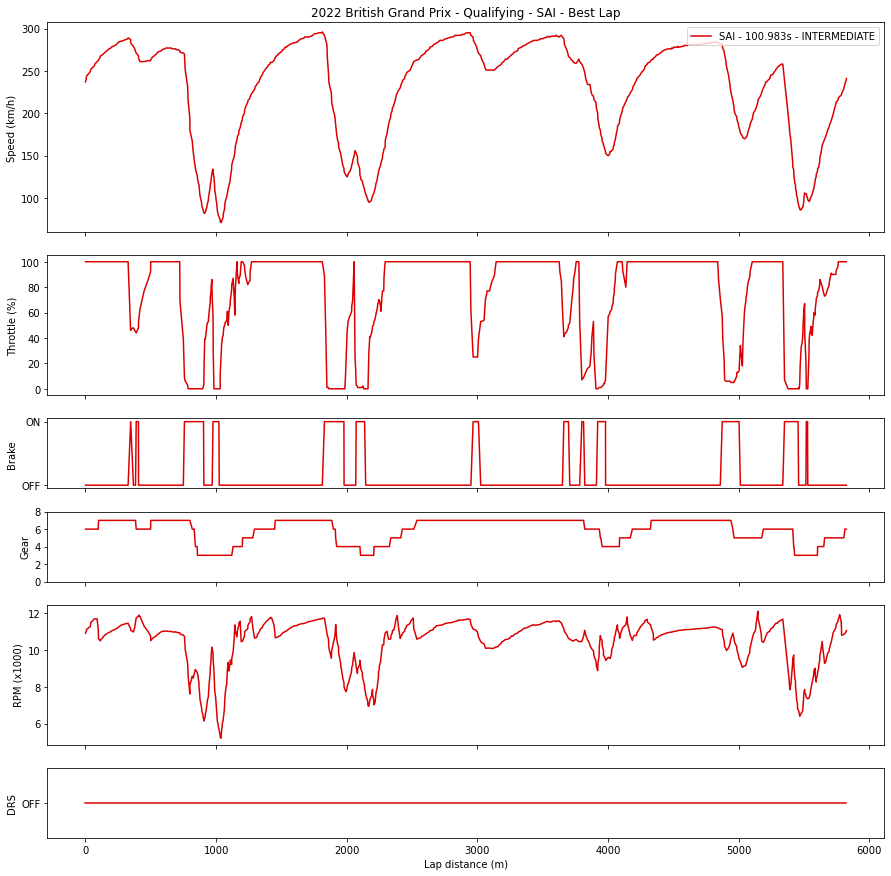

2      9
3      9
4      9
5      9
6      9
      ..
754    9
755    9
756    9
757    9
758    9
Name: DRS, Length: 757, dtype: int64


In [70]:
### SINGLE DRIVER TELEM PLOT (DRIVER 1)

# Create subplots with different sizes
fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
ax[0].set_title(plot_title)

# Speed trace
ax[0].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1_label, color=ff1.plotting.team_color(team_driver_1))
ax[0].set(ylabel='Speed (km/h)')
ax[0].legend(loc="upper right")

# Throttle trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].set(ylabel='Throttle (%)')

# Brake trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].set(ylabel='Brake')
ax[2].set_yticks([0,1])
ax[2].set_yticklabels(['OFF','ON'])

# Gear trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].set(ylabel='Gear')
ax[3].set_yticks([0,2,4,6,8])


# RPM trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM']/1000, label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].set(ylabel='RPM (x1000)')

# DRS trace, make binary
bin_drs_driver_1 = [int(i>9) for i in telemetry_driver_1['DRS']]

#ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].set_yticks([0,1])
ax[5].set_yticklabels(['OFF','ON'])
ax[5].plot(telemetry_driver_1['Distance'], bin_drs_driver_1, label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].set(ylabel='DRS')
ax[5].set(xlabel='Lap distance (m)')


#    CROP to Distances

#distance_min = 1200
#distance_max = 3200

#for i in range(0,6):
#    ax[i].set_xlim(distance_min, distance_max)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
#plt.savefig('telem_plots/' + plot_filename, dpi=300)
plt.show()

print(telemetry_driver_1['DRS'])

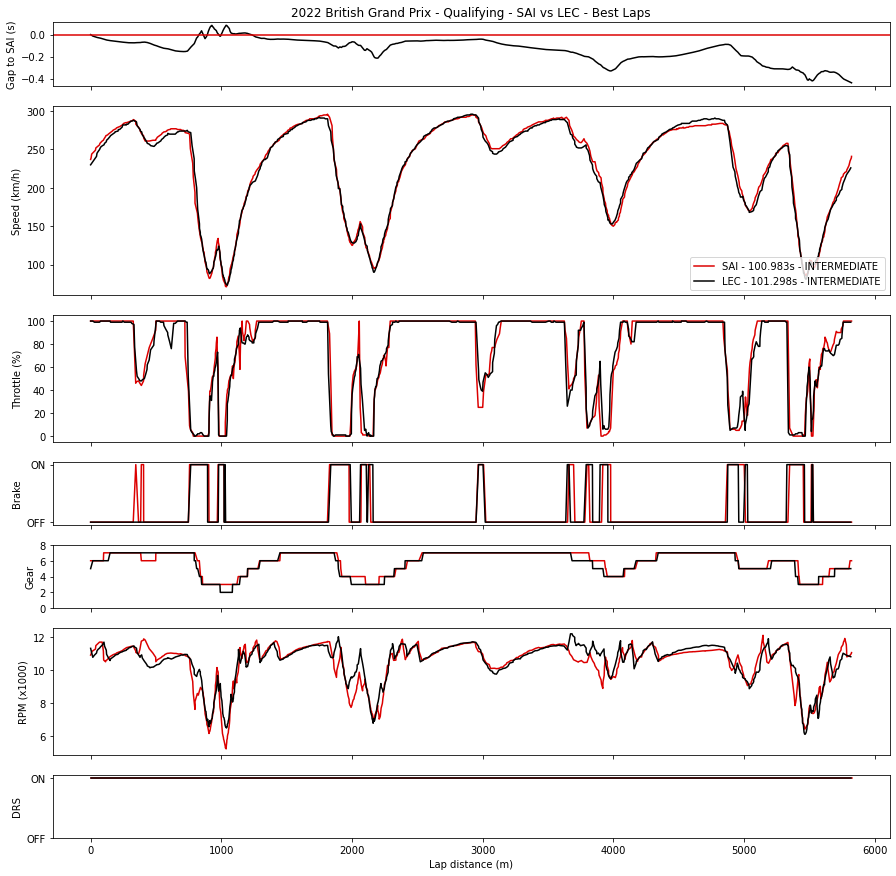

In [71]:
### TWO DRIVER TELEM PLOT
plot_ratios_2 = [1, 3, 2, 1, 1, 2, 1]

# Colour Format
if ff1.plotting.team_color(team_driver_1) == ff1.plotting.team_color(team_driver_2):
    color_2 = 'black'
else:
    color_2 = ff1.plotting.team_color(team_driver_2)






plt.rcParams['figure.figsize'] = plot_size

plot_num = 7

# Create subplots with different sizes
fig, ax = plt.subplots(plot_num, gridspec_kw={'height_ratios': plot_ratios_2})
ax[0].set_title(plot_title_2)

# Delta trace

delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_2, fastest_driver_1)
ax[0].plot(ref_tel['Distance'], delta_time, color = color_2)
ax[0].axhline(0, color=ff1.plotting.team_color(team_driver_1))
ax[0].set(ylabel=f"Gap to {driver_1} (s)")


# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1_label, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2_label, color=color_2)
ax[1].set(ylabel='Speed (km/h)')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=color_2)
ax[2].set(ylabel='Throttle (%)')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=color_2)
ax[3].set(ylabel='Brake')
ax[3].set_yticks([0,1])
ax[3].set_yticklabels(['OFF','ON'])

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=color_2)
ax[4].set(ylabel='Gear')
ax[4].set_yticks([0,2,4,6,8])


# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM']/1000, label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM']/1000, label=driver_2, color=color_2)
ax[5].set(ylabel='RPM (x1000)')

# DRS trace, make binary
bin_drs_driver_1 = [int(i>8) for i in telemetry_driver_1['DRS']]
bin_drs_driver_2 = [int(i>8) for i in telemetry_driver_2['DRS']]

#ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))

ax[6].plot(telemetry_driver_1['Distance'], bin_drs_driver_1, label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], bin_drs_driver_2, label=driver_2, color=color_2)
ax[6].set_yticks([0,1])
ax[6].set_yticklabels(['OFF','ON'])
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (m)')


#    CROP to Distances

#distance_min = 3000
#distance_max = 4000

#for i in range(0,plot_num):
#    ax[i].set_xlim(distance_min, distance_max)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
#plt.savefig('telem_plots/' + plot_filename_2, dpi=300)
plt.show()

# Testing

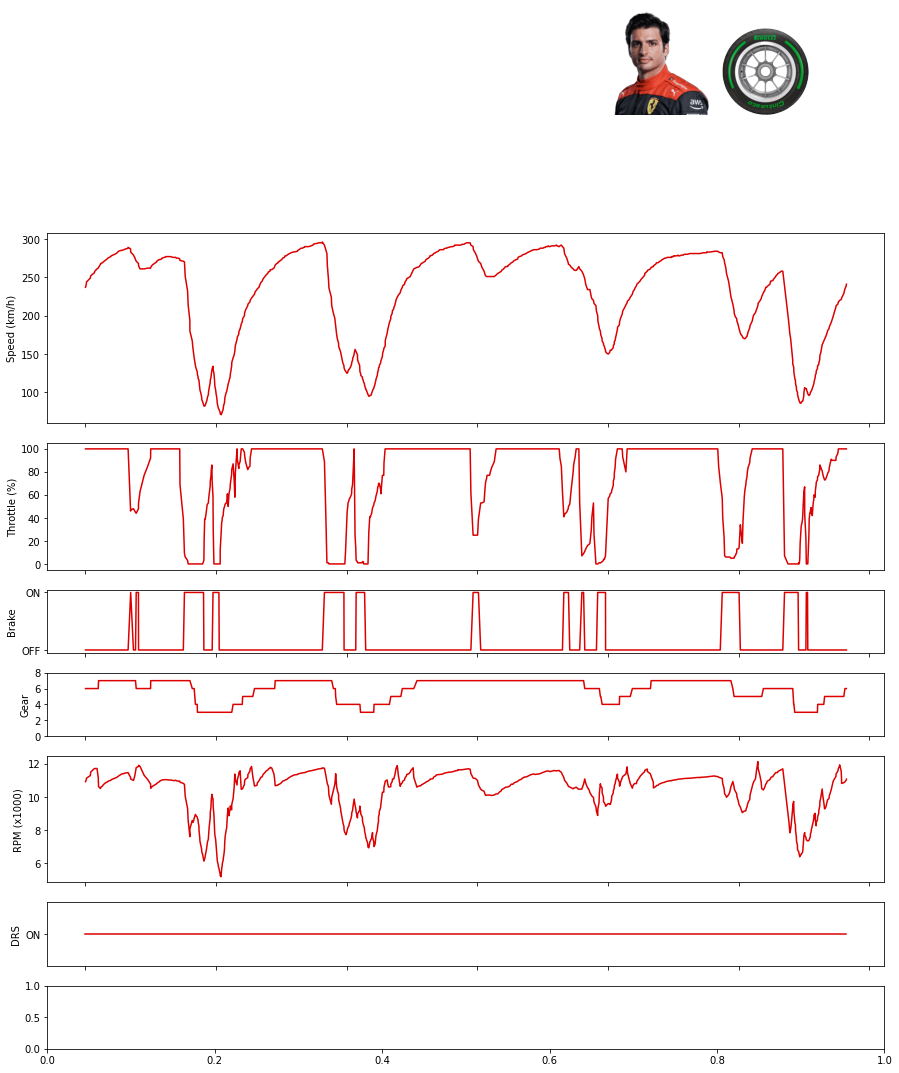

In [72]:
### TESTING

#plt.rcParams['figure.figsize'] = plot_size


plot_ratios_3 = [3, 2, 1, 1, 2, 1, 1]
rows = 1
columns = 4

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios_3})
#ax[0] = plt.subplots(1,3)



driv_ax = fig.add_axes([0.64, .99, 0.10, 0.10], zorder=1)
d_img = mpimg.imread(f"/Users/andylyford/Desktop/PROJECTS/F1/vis/drivers/{driver_1}.png")
driv_ax.imshow(d_img)
driv_ax.axis("off")


tyre_ax = fig.add_axes([0.75, .99, 0.08, 0.08], zorder=1)
t_img = mpimg.imread(f"/Users/andylyford/Desktop/PROJECTS/F1/vis/tyres/{tyre_1}.png")
tyre_ax.imshow(t_img)
tyre_ax.axis("off")





# Speed trace
ax[0].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1_label, color=ff1.plotting.team_color(team_driver_1))
ax[0].set(ylabel='Speed (km/h)')
#ax[0].legend(loc="upper right")

# Throttle trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].set(ylabel='Throttle (%)')

# Brake trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].set(ylabel='Brake')
ax[2].set_yticks([0,1])
ax[2].set_yticklabels(['OFF','ON'])

# Gear trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].set(ylabel='Gear')
ax[3].set_yticks([0,2,4,6,8])


# RPM trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM']/1000, label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].set(ylabel='RPM (x1000)')

# DRS trace, make binary
bin_drs_driver_1 = [int(i>8) for i in telemetry_driver_1['DRS']]

#ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].set_yticks([0,1])
ax[5].set_yticklabels(['OFF','ON'])
ax[5].plot(telemetry_driver_1['Distance'], bin_drs_driver_1, label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].set(ylabel='DRS')
ax[5].set(xlabel='Lap distance (m)')


#    CROP to Distances

#distance_min = 1200
#distance_max = 3200

#for i in range(0,6):
#    ax[i].set_xlim(distance_min, distance_max)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
#plt.savefig('telem_plots/' + plot_filename, dpi=300)
plt.show()

Text(5, 2, 'Full Throttle %')

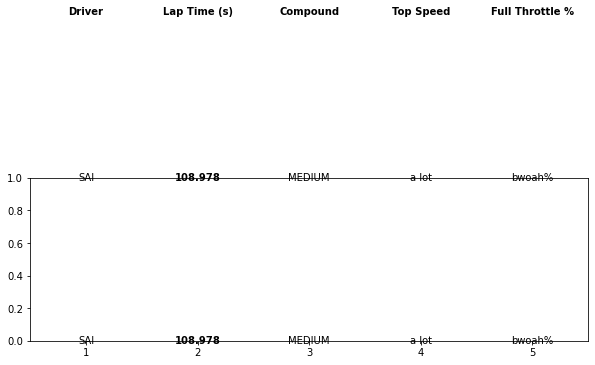

In [47]:


# set the number of rows and cols for our table

rows = 2
cols = 5

fig, ax = plt.subplots(figsize=(10,rows+1))

# create a coordinate system based on the number of rows/columns



#ax.set_ylim(-0.1, 0.4)
ax.set_xlim(0.5, cols + 0.5)

for row in range(rows):
    # player name column
    ax.text(x=1, y=row, s=driver_1, va='center', ha='center')
    
    # lap time col
    ax.text(x=2, y=row, s=lap_time_1, va='center', ha='center', weight='bold')
    
    # Tyre col
    ax.text(x=3, y=row, s=tyre_1, va='center', ha='center')
    
    # Top Speed column
    ax.text(x=4, y=row, s='a lot', va='center', ha='center')
    
    # Full Throttle %
    ax.text(x=5, y=row, s='bwoah%', va='center', ha='center')
    
ax.text(1, rows, 'Driver', weight='bold', ha='center')
ax.text(2, rows, 'Lap Time (s)', weight='bold', ha='center')
ax.text(3, rows, 'Compound', weight='bold', ha='center')
ax.text(4, rows, 'Top Speed', weight='bold', ha='center')
ax.text(5, rows, 'Full Throttle %', weight='bold', ha='center')


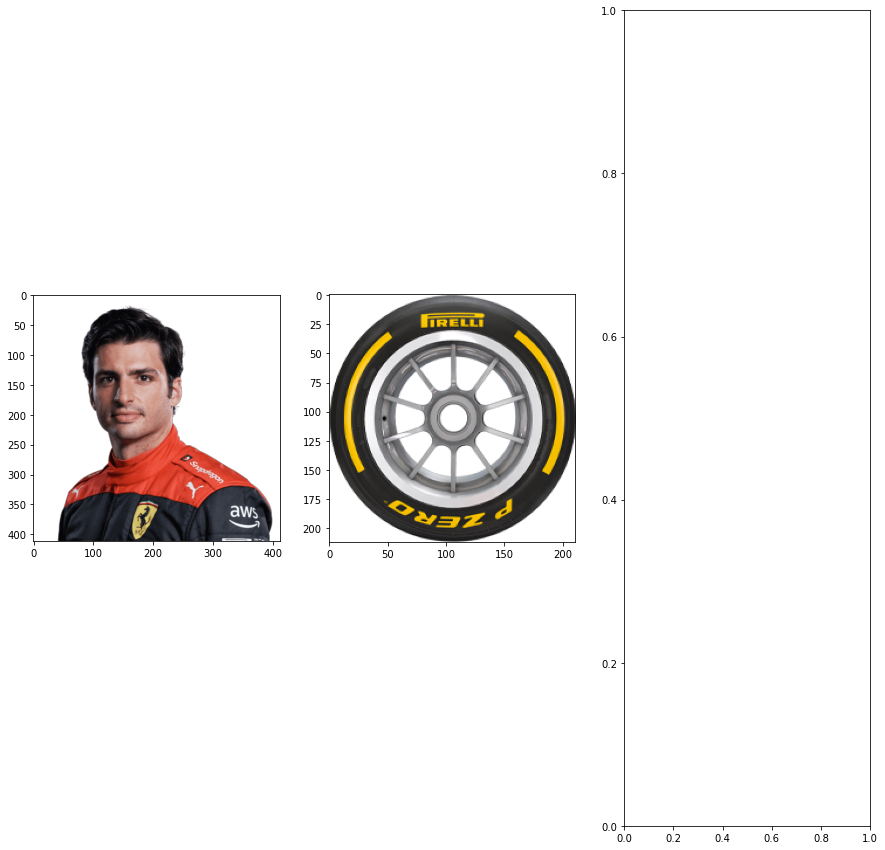

In [48]:
### DRIVER, COMPOUND AND TEAM PICS
from PIL import Image
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)


d_img = mpimg.imread(f"/Users/andylyford/Desktop/PROJECTS/F1/vis/drivers/{driver_1}.png")
driver_img = ax1.imshow(d_img)

t_img = mpimg.imread(f"/Users/andylyford/Desktop/PROJECTS/F1/vis/tyres/{tyre_1}.png")
tyre_img = ax2.imshow(t_img)

plt.show()


